<a href="https://colab.research.google.com/github/oabdi444/AI-Face-Recognition-System/blob/main/Audio_Classification_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##### Audio Classification Using Machine Learning
#####dataset url https://urbansounddataset.weebly.com/urbansound8k.html

In [1]:
!pip install librosa

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile

In [4]:
import IPython.display as ipd
import librosa
import librosa.display

In [5]:
# Download the dataset
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz?download=1 -O UrbanSound8K.tar.gz

--2025-06-21 14:28:54--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1203745/files/UrbanSound8K.tar.gz [following]
--2025-06-21 14:28:54--  https://zenodo.org/records/1203745/files/UrbanSound8K.tar.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz 100%[===================>]   5.61G  21.9MB/s    in 5m 29s  

2025-06-21 14:34:24 (17.4 MB/s) - ‘UrbanSound8K.tar.gz’ saved [6023741708/6023741708]



In [6]:
import tarfile

# Extract the archive to a folder
with tarfile.open('UrbanSound8K.tar.gz', 'r:gz') as tar:
    tar.extractall('UrbanSound8K_extracted')

print("✅ Extraction complete!")


✅ Extraction complete!


In [7]:
import os
import librosa

# Path to one sample file (dog bark)
file_path = 'UrbanSound8K_extracted/UrbanSound8K/audio/fold1/7061-6-0-0.wav'

# Load the file
if os.path.exists(file_path):
    y, sr = librosa.load(file_path, sr=None)
    print(f"🎧 Audio loaded: Sample Rate = {sr}, Duration = {len(y)/sr:.2f} seconds")
else:
    print("❌ File not found!")


🎧 Audio loaded: Sample Rate = 44100, Duration = 2.25 seconds


In [8]:
!dir

app.py	  sample_data		     UrbanSound8K.tar.gz
logs.txt  sound_classifier_model.h5  X_mfcc.npy
log.txt   UrbanSound8K_extracted     y_labels.npy


In [9]:
import pandas as pd

# Path to the metadata CSV
metadata_path = 'UrbanSound8K_extracted/UrbanSound8K/metadata/UrbanSound8K.csv'

# Load metadata
df = pd.read_csv(metadata_path)

# Filter for "dog_bark" class (classID 6)
dog_barks = df[df['class'] == 'dog_bark']
print(f"✅ Found {len(dog_barks)} dog bark samples.")

# Show a few rows
dog_barks[['slice_file_name', 'fold', 'class']]


✅ Found 1000 dog bark samples.


,slice_file_name,fold,class
0,100032-3-0-0.wav,5,dog_bark
14,100652-3-0-0.wav,2,dog_bark
15,100652-3-0-1.wav,2,dog_bark
16,100652-3-0-2.wav,2,dog_bark
17,100652-3-0-3.wav,2,dog_bark
...,...,...,...
8594,97193-3-0-4.wav,2,dog_bark
8595,97193-3-0-6.wav,2,dog_bark
8611,97392-3-0-0.wav,6,dog_bark
8618,97756-3-0-0.wav,10,dog_bark


In [10]:
import librosa
import IPython.display as ipd

# Load the first 3 dog bark samples
for idx, row in dog_barks.head(3).iterrows():
    fold = row['fold']
    file = row['slice_file_name']
    path = f'UrbanSound8K_extracted/UrbanSound8K/audio/fold{fold}/{file}'

    if os.path.exists(path):
        print(f"\n🎧 Playing: {file} (Fold {fold})")
        y, sr = librosa.load(path, sr=None)
        print(f"Duration: {len(y)/sr:.2f} sec | Sample rate: {sr}")
        ipd.display(ipd.Audio(y, rate=sr))
    else:
        print(f"❌ File not found: {path}")



🎧 Playing: 100032-3-0-0.wav (Fold 5)
Duration: 0.32 sec | Sample rate: 44100



🎧 Playing: 100652-3-0-0.wav (Fold 2)
Duration: 4.00 sec | Sample rate: 44100



🎧 Playing: 100652-3-0-1.wav (Fold 2)
Duration: 4.00 sec | Sample rate: 44100


Using example file: UrbanSound8K_extracted/UrbanSound8K/audio/fold5/100032-3-0-0.wav
MFCC shape: (13, 28) (13 coefficients x 28 frames)


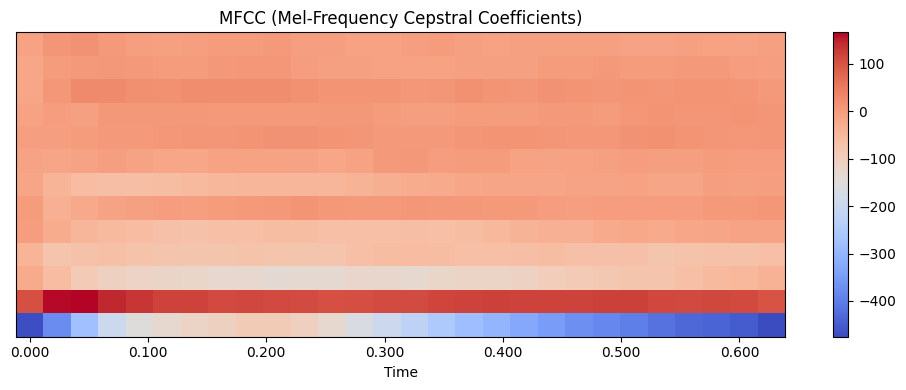

In [11]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Get the path of the first dog bark sample from the DataFrame
if not dog_barks.empty:
    first_dog_bark = dog_barks.iloc[0]
    fold = first_dog_bark['fold']
    file = first_dog_bark['slice_file_name']
    example_path = f'UrbanSound8K_extracted/UrbanSound8K/audio/fold{fold}/{file}'
    print(f"Using example file: {example_path}")

    # Load the audio
    try:
        y, sr = librosa.load(example_path, sr=None)

        # Extract MFCCs
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # Show shape and plot
        print(f"MFCC shape: {mfcc.shape} (13 coefficients x {mfcc.shape[1]} frames)")

        # Plot MFCCs
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfcc, x_axis='time')
        plt.colorbar()
        plt.title('MFCC (Mel-Frequency Cepstral Coefficients)')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"❌ Error loading or processing audio file: {e}")
else:
    print("❌ No dog bark samples found in the DataFrame.")

In [12]:
mfcc_features = []
labels = []

for idx, row in dog_barks.iterrows():
    fold = row['fold']
    file = row['slice_file_name']
    label = row['classID']  # label for dog_bark is 6

    path = f'UrbanSound8K_extracted/UrbanSound8K/audio/fold{fold}/{file}'

    try:
        y, sr = librosa.load(path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        # Take the mean across time axis to flatten the feature (optional)
        mfcc_mean = np.mean(mfcc, axis=1)
        mfcc_features.append(mfcc_mean)
        labels.append(label)
    except Exception as e:
        print(f"❌ Error processing {file}: {e}")


In [13]:
X = np.array(mfcc_features)
y = np.array(labels)

print(f"✅ Features shape: {X.shape}")
print(f"✅ Labels shape: {y.shape}")


✅ Features shape: (1000, 13)
✅ Labels shape: (1000,)


In [14]:
import pandas as pd

# Load the metadata CSV
metadata_path = 'UrbanSound8K_extracted/UrbanSound8K/metadata/UrbanSound8K.csv'
df = pd.read_csv(metadata_path)
print(f"✅ Loaded {len(df)} total audio samples.")


✅ Loaded 8732 total audio samples.


In [15]:
import os
import librosa
import numpy as np

mfcc_features = []
labels = []

for idx, row in df.iterrows():
    fold = row['fold']
    file = row['slice_file_name']
    label = row['classID']

    file_path = f'UrbanSound8K_extracted/UrbanSound8K/audio/fold{fold}/{file}'

    try:
        y, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc, axis=1)  # flatten across time
        mfcc_features.append(mfcc_mean)
        labels.append(label)
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")


/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/usr/local/lib/python3.11/dist-packages/librosa/feature/spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [16]:
X = np.array(mfcc_features)
y = np.array(labels)

print(f"✅ MFCC Feature matrix shape: {X.shape}")
print(f"✅ Labels shape: {y.shape}")


✅ MFCC Feature matrix shape: (8732, 13)
✅ Labels shape: (8732,)


In [17]:
np.save('X_mfcc.npy', X)
np.save('y_labels.npy', y)
print("💾 Features and labels saved as .npy files.")


💾 Features and labels saved as .npy files.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data split:")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


✅ Data split:
Train shape: (6985, 13), Test shape: (1747, 13)


In [19]:
# Train a Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

print("✅ Model training complete.")


✅ Model training complete.


In [20]:
# Predict on test set
y_pred = clf.predict(X_test)

# Show metrics
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc:.2f}")

# Show full classification report
print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))


🎯 Accuracy: 0.88

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       200
           1       0.93      0.62      0.74        86
           2       0.81      0.84      0.83       200
           3       0.83      0.85      0.84       200
           4       0.88      0.91      0.89       200
           5       0.93      0.95      0.94       200
           6       0.94      0.65      0.77        75
           7       0.88      0.94      0.91       200
           8       0.91      0.93      0.92       186
           9       0.82      0.85      0.84       200

    accuracy                           0.88      1747
   macro avg       0.89      0.85      0.86      1747
weighted avg       0.88      0.88      0.88      1747



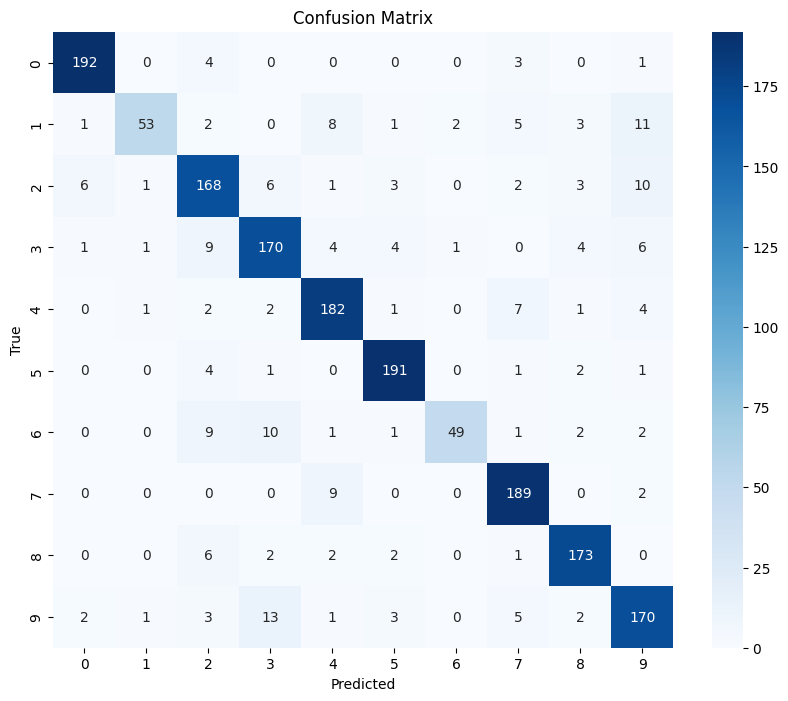

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the MLP model
model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,770 (147.54 KB)

 Trainable params: 37,770 (147.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.1403 - loss: 14.7396 - val_accuracy: 0.1382 - val_loss: 2.2693
Epoch 2/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1531 - loss: 2.2992 - val_accuracy: 0.1632 - val_loss: 2.2240
Epoch 3/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1780 - loss: 2.2031 - val_accuracy: 0.1983 - val_loss: 2.1409
Epoch 4/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2092 - loss: 2.1441 - val_accuracy: 0.2827 - val_loss: 2.0722
Epoch 5/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2311 - loss: 2.0737 - val_accuracy: 0.3193 - val_loss: 1.9570
Epoch 6/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2653 - loss: 2.0152 - val_accuracy: 0.3021 - val_loss: 1.9504
Epoch 7/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2606 - loss: 1.9619 - val_accuracy: 0.3142 - val_loss: 1.9059
Epoch 8/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2894 - loss: 1.9170 - val_accuracy: 

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"✅ Test accuracy: {test_acc:.2f}")


55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7384 - loss: 0.8274
✅ Test accuracy: 0.73


In [25]:
model.save("sound_classifier_model.h5")


In [26]:
!pip install flask pyngrok tensorflow numpy --quiet


In [68]:
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz?download=1 -O UrbanSound8K.tar.gz


--2025-06-21 14:18:27--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz?download=1
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.48.194, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1203745/files/UrbanSound8K.tar.gz [following]
--2025-06-21 14:18:28--  https://zenodo.org/records/1203745/files/UrbanSound8K.tar.gz
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz 100%[===================>]   5.61G  19.3MB/s    in 5m 10s  

2025-06-21 14:23:38 (18.5 MB/s) - ‘UrbanSound8K.tar.gz’ saved [6023741708/6023741708]



In [27]:
import tarfile

# Extract the archive into a folder called "UrbanSound8K"
with tarfile.open("UrbanSound8K.tar.gz", "r:gz") as tar:
    tar.extractall("UrbanSound8K_extracted")
    print("✅ Dataset extracted successfully!")


✅ Dataset extracted successfully!


In [28]:
import pandas as pd

csv_path = "UrbanSound8K_extracted/UrbanSound8K/metadata/UrbanSound8K.csv"
df = pd.read_csv(csv_path)

print("✅ CSV loaded. Number of samples:", len(df))
df.head()


✅ CSV loaded. Number of samples: 8732


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [29]:
pip install sounddevice librosa tensorflow numpy

In [30]:
! pip install pipwin
! pipwin install pyaudio
! pip install sounddevice


/usr/local/lib/python3.11/dist-packages/pipwin/command.py:66: UserWarning: Found a non Windows system. Package installation might not work.
  warn("Found a non Windows system. Package installation might not work.")
Building cache. Hang on . . .
Traceback (most recent call last):
  File "/usr/local/bin/pipwin", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pipwin/command.py", line 84, in main
    cache = pipwin.PipwinCache()
            ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pipwin/pipwin.py", line 210, in __init__
    self.data = build_cache()
                ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pipwin/pipwin.py", line 103, in build_cache
    dl_function = re.search(r"function dl.*\}", soup.find("script").string).group(0)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attribute 'group'


In [31]:
!pip install streamlit ngrok librosa soundfile --quiet


In [32]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
import librosa
import soundfile as sf
import tempfile
import pandas as pd

# 🎧 UrbanSound8K class labels
class_labels = [
    "air_conditioner", "car_horn", "children_playing", "dog_bark", "drilling",
    "engine_idling", "gun_shot", "jackhammer", "siren", "street_music"
]

# Load the model
@st.cache_resource
def load_model():
    return tf.keras.models.load_model("sound_classifier_model.h5")

model = load_model()

# Initialize session state for history
if "history" not in st.session_state:
    st.session_state["history"] = []

# Page UI
st.set_page_config(page_title="🎧 UrbanSound Classifier", layout="centered")
st.title("🎧 UrbanSound Classifier")
st.markdown("Upload a `.wav` file to classify the sound using a deep learning model trained on UrbanSound8K.")

uploaded_file = st.file_uploader("📁 Upload a `.wav` file", type="wav")

if uploaded_file is not None:
    # Save temp file
    with tempfile.NamedTemporaryFile(delete=False, suffix=".wav") as tmp:
        tmp.write(uploaded_file.read())
        tmp_path = tmp.name

    # Load and process
    y, sr = librosa.load(tmp_path, sr=None)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1).reshape(1, -1)

    # Predict
    prediction = model.predict(mfcc_mean)[0]
    predicted_class = int(np.argmax(prediction))
    confidence = float(np.max(prediction))

    # Show audio
    st.audio(tmp_path, format='audio/wav')

    # 🎯 Show top prediction
    st.success(f"🎯 Predicted: **{class_labels[predicted_class]}** (Confidence: {confidence:.2f})")

    # 🔍 Show top 3 predictions
    st.markdown("#### 🔍 Top 3 Predictions:")
    top_indices = prediction.argsort()[-3:][::-1]
    for i, idx in enumerate(top_indices):
        st.write(f"{i+1}. **{class_labels[idx]}** — {prediction[idx]:.2f}")

    # 💾 Save to session history
    st.session_state["history"].append({
        "File": uploaded_file.name,
        "Prediction": class_labels[predicted_class],
        "Confidence": f"{confidence:.2f}"
    })

# 🧾 Show history table
if st.session_state["history"]:
    st.markdown("### 🗂️ Prediction History")
    df = pd.DataFrame(st.session_state["history"])
    st.dataframe(df)

# 🧠 Mic Detection (Run Locally — Not in Colab)
st.markdown("---")
st.markdown("### 🎤 Real-Time Mic Detection (For Local Use Only)")
st.code("""
import sounddevice as sd
import librosa
import tensorflow as tf
import numpy as np

model = tf.keras.models.load_model("sound_classifier_model.h5")

def predict_live(audio, sr):
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    mfcc_mean = np.mean(mfcc, axis=1).reshape(1, -1)
    prediction = model.predict(mfcc_mean)
    return np.argmax(prediction), np.max(prediction)

def callback(indata, frames, time, status):
    audio = indata[:, 0]
    label, conf = predict_live(audio, sr=16000)
    print(f"🔊 Predicted: {label} — {conf:.2f}")

with sd.InputStream(callback=callback, channels=1, samplerate=16000, blocksize=16000):
    sd.sleep(60000)  # Listen for 60 sec
""", language="python")

st.info("💡 Mic input only works in local Python, not in Google Colab or Hugging Face.")

# ✅ Footer
st.markdown("---")
st.markdown("Made with ❤️ by Osman · Powered by TensorFlow and UrbanSound8K")



Overwriting app.py


In [33]:
!pip install streamlit pyngrok librosa soundfile --quiet


In [34]:
from pyngrok import ngrok

# Replace YOUR_TOKEN_HERE with the actual token you copied
ngrok.set_auth_token("2yoxvSnbIgytFrWWcBzrTvffDJZ_2RvCGHM8xDwvtHmoA5GKa")

In [35]:
!pip install streamlit pyngrok librosa soundfile pandas --quiet
from pyngrok import ngrok
ngrok.set_auth_token("2yoxvSnbIgytFrWWcBzrTvffDJZ_2RvCGHM8xDwvtHmoA5GKa")
!streamlit run app.py &>/content/logs.txt &
public_url = ngrok.connect(8501)
print("🌍 App is live at:", public_url)


🌍 App is live at: NgrokTunnel: "https://356e-35-233-187-247.ngrok-free.app" -> "http://localhost:8501"


In [36]:
# 🔁 Start Streamlit server (this runs in background)
!streamlit run app.py &>/content/log.txt &

# 🌍 Start ngrok tunnel on port 8501
public_url = ngrok.connect(8501)
print("✅ Streamlit is running at:", public_url)


✅ Streamlit is running at: NgrokTunnel: "https://5d97-35-233-187-247.ngrok-free.app" -> "http://localhost:8501"
